Test Runner (25 km/h, 1 Ammo Clip)
Survival Probability: 0.9998
Prediction (1=Survive, 0=Infected): 1


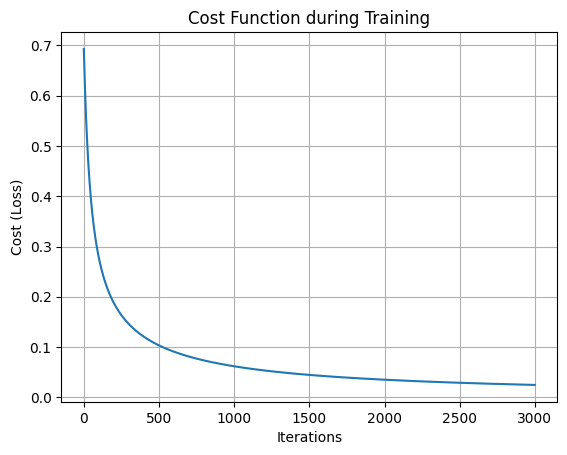

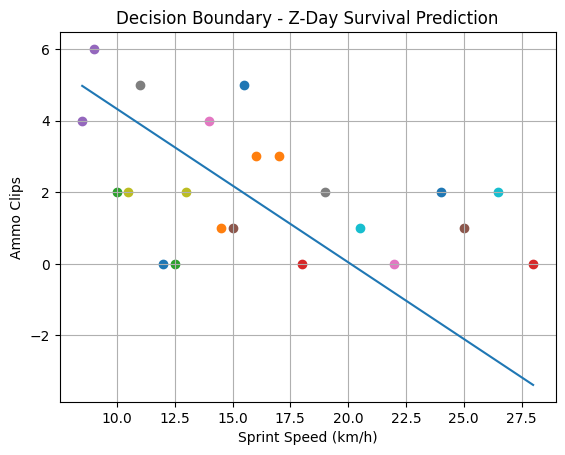

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#raw_data
raw_data = """
12,0,0
14.5,1,0
10,2,0
18,0,0
8.5,4,0
15,1,0
22,0,1
11,5,1
13,2,0
20.5,1,1
24,2,1
16,3,1
12.5,0,0
28,0,1
9,6,1
25,1,1
14,4,1
19,2,1
10.5,2,0
26.5,2,1
15.5,5,1
17,3,1
"""

X = []
Y = []

for line in raw_data.strip().split("\n"):
    s, a, r = line.split(",")
    X.append([float(s), float(a)])
    Y.append(float(r))

X = np.array(X)
Y = np.array(Y)

# NORMALIZATION (FEATURE SCALING)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X_norm = (X - X_mean) / X_std

X_final = np.c_[np.ones(X_norm.shape[0]), X_norm]

# SIGMOID FUNCTION
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# GRADIENT DESCENT
theta = np.zeros(X_final.shape[1])
learning_rate = 0.1
itr = 3000
m = len(Y)
cost_history = []

for _ in range(itr):
    z = X_final.dot(theta)
    h = sigmoid(z)

    cost = (-1/m) * np.sum(Y * np.log(h + 1e-9) + (1 - Y) * np.log(1 - h + 1e-9))
    cost_history.append(cost)

    gradient = (1/m) * X_final.T.dot(h - Y)
    theta -= learning_rate * gradient

# TEST PREDICTION (25 km/h, 1 Ammo Clip)
test_point = np.array([25, 1])
test_norm = (test_point - X_mean) / X_std
test_final = np.insert(test_norm, 0, 1)

probability = sigmoid(test_final.dot(theta))
prediction = 1 if probability >= 0.5 else 0

print("Test Runner (25 km/h, 1 Ammo Clip)")
print("Survival Probability:", round(float(probability), 4))
print("Prediction (1=Survive, 0=Infected):", prediction)

# COST FUNCTION PLOT
plt.figure()
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Loss)")
plt.title("Cost Function during Training")
plt.grid(True)
plt.show()

# DECISION BOUNDARY PLOT
plt.figure()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.scatter(X[i][0], X[i][1])
    else:
        plt.scatter(X[i][0], X[i][1])

x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = -(theta[0] + theta[1] * ((x_vals - X_mean[0]) / X_std[0])) / theta[2]
y_vals = y_vals * X_std[1] + X_mean[1]

plt.plot(x_vals, y_vals)
plt.xlabel("Sprint Speed (km/h)")
plt.ylabel("Ammo Clips")
plt.title("Decision Boundary - Z-Day Survival Prediction")
plt.grid(True)
plt.show()
